In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Expanded_data_with_more_features.csv')
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [4]:
#interested in predicting math test scores based on the other relevant features

target = df['MathScore']
target

0        71
1        69
2        87
3        45
4        76
         ..
30636    59
30637    58
30638    61
30639    82
30640    64
Name: MathScore, Length: 30641, dtype: int64

In [5]:
df['WklyStudyHours'].unique()

array(['< 5', '5 - 10', '> 10', nan], dtype=object)

In [6]:
df['ParentEduc'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school', nan],
      dtype=object)

In [9]:
nan_values = df.isnull().sum()

print(nan_values)

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc                0
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours            0
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64


In [47]:
frequency = df['WklyStudyHours'].value_counts()

# Get the most frequent category
most_frequent_category = frequency.idxmax()

# Display the frequency count and the most frequent category
print("Frequency Count:")
print(frequency)
print("\nMost Frequent Category:", most_frequent_category)

Frequency Count:
5 - 10    16246
< 5        8238
> 10       5202
Name: WklyStudyHours, dtype: int64

Most Frequent Category: 5 - 10


In [6]:
mapping = {
    '< 5': 1,
    '5 - 10': 2,
    '> 10': 3,
    float('nan'): 0
}

df['WklyStudyHours'] = df['WklyStudyHours'].map(mapping)

df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,1,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,2,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,1,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,2,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,2,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,2,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,2,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,2,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,2,82,90,93


In [50]:
frequencyp = df['ParentEduc'].value_counts()

# Get the most frequent category
most_frequent_categoryp = frequencyp.idxmax()

# Display the frequency count and the most frequent category
print("Frequency Count:")
print(frequencyp)
print("\nMost Frequent Category:", most_frequent_categoryp)

Frequency Count:
some college          6633
high school           5687
associate's degree    5550
some high school      5517
bachelor's degree     3386
master's degree       2023
Name: ParentEduc, dtype: int64

Most Frequent Category: some college


In [8]:
mappingp = {
    "some high school": 1,
    "high school": 2,
    "some college": 3,
    "associate's degree": 4,
    "bachelor's degree": 5,
    "master's degree": 6,
    "doctoral degree": 7,
    float('nan'): 0
}

# Convert parent's education level to numeric values
df['ParentEduc'] = df['ParentEduc'].map(mappingp)

# Display the updated dataframe
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,5,standard,none,married,regularly,yes,3.0,school_bus,1,71,71,74
1,1,female,group C,3,standard,NaN,married,sometimes,yes,0.0,NaN,2,69,90,88
2,2,female,group B,6,standard,none,single,sometimes,yes,4.0,school_bus,1,87,93,91
3,3,male,group A,4,free/reduced,none,married,never,no,1.0,NaN,2,45,56,42
4,4,male,group C,3,standard,none,married,sometimes,yes,0.0,school_bus,2,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,2,standard,none,single,sometimes,no,2.0,school_bus,2,59,61,65
30637,890,male,group E,2,standard,none,single,regularly,no,1.0,private,2,58,53,51
30638,911,female,NaN,2,free/reduced,completed,married,sometimes,no,1.0,private,2,61,70,67
30639,934,female,group D,4,standard,completed,married,regularly,no,3.0,school_bus,2,82,90,93


In [54]:
frequency_eth = df['EthnicGroup'].value_counts()

# Get the most frequent category
most_frequent_category_eth = frequency_eth.idxmax()

# Display the frequency count and the most frequent category
print("Frequency Count:")
print(frequency_eth)
print("\nMost Frequent Category:", most_frequent_category_eth)

Frequency Count:
group C    9212
group D    7503
group B    5826
group E    4041
group A    2219
Name: EthnicGroup, dtype: int64

Most Frequent Category: group C


In [74]:
frequency_tst = df['TestPrep'].value_counts()

# Get the most frequent category
most_frequent_category_tst = frequency_tst.idxmax()

# Display the frequency count and the most frequent category
print("Frequency Count:")
print(frequency_tst)
print("\nMost Frequent Category:", most_frequent_category_tst)

Frequency Count:
none         18856
completed     9955
Name: TestPrep, dtype: int64

Most Frequent Category: none


In [10]:
# Define the mapping dictionary
mapping = {
    "none": 1,
    "completed": 2,
    float('nan'): 0
}

# Convert TestPrep column to numeric values
df['TestPrep'] = df['TestPrep'].map(mapping)

# Display the updated dataframe
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,5,standard,1,married,regularly,yes,3.0,school_bus,1,71,71,74
1,1,female,group C,3,standard,0,married,sometimes,yes,0.0,NaN,2,69,90,88
2,2,female,group B,6,standard,1,single,sometimes,yes,4.0,school_bus,1,87,93,91
3,3,male,group A,4,free/reduced,1,married,never,no,1.0,NaN,2,45,56,42
4,4,male,group C,3,standard,1,married,sometimes,yes,0.0,school_bus,2,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,2,standard,1,single,sometimes,no,2.0,school_bus,2,59,61,65
30637,890,male,group E,2,standard,1,single,regularly,no,1.0,private,2,58,53,51
30638,911,female,NaN,2,free/reduced,2,married,sometimes,no,1.0,private,2,61,70,67
30639,934,female,group D,4,standard,2,married,regularly,no,3.0,school_bus,2,82,90,93


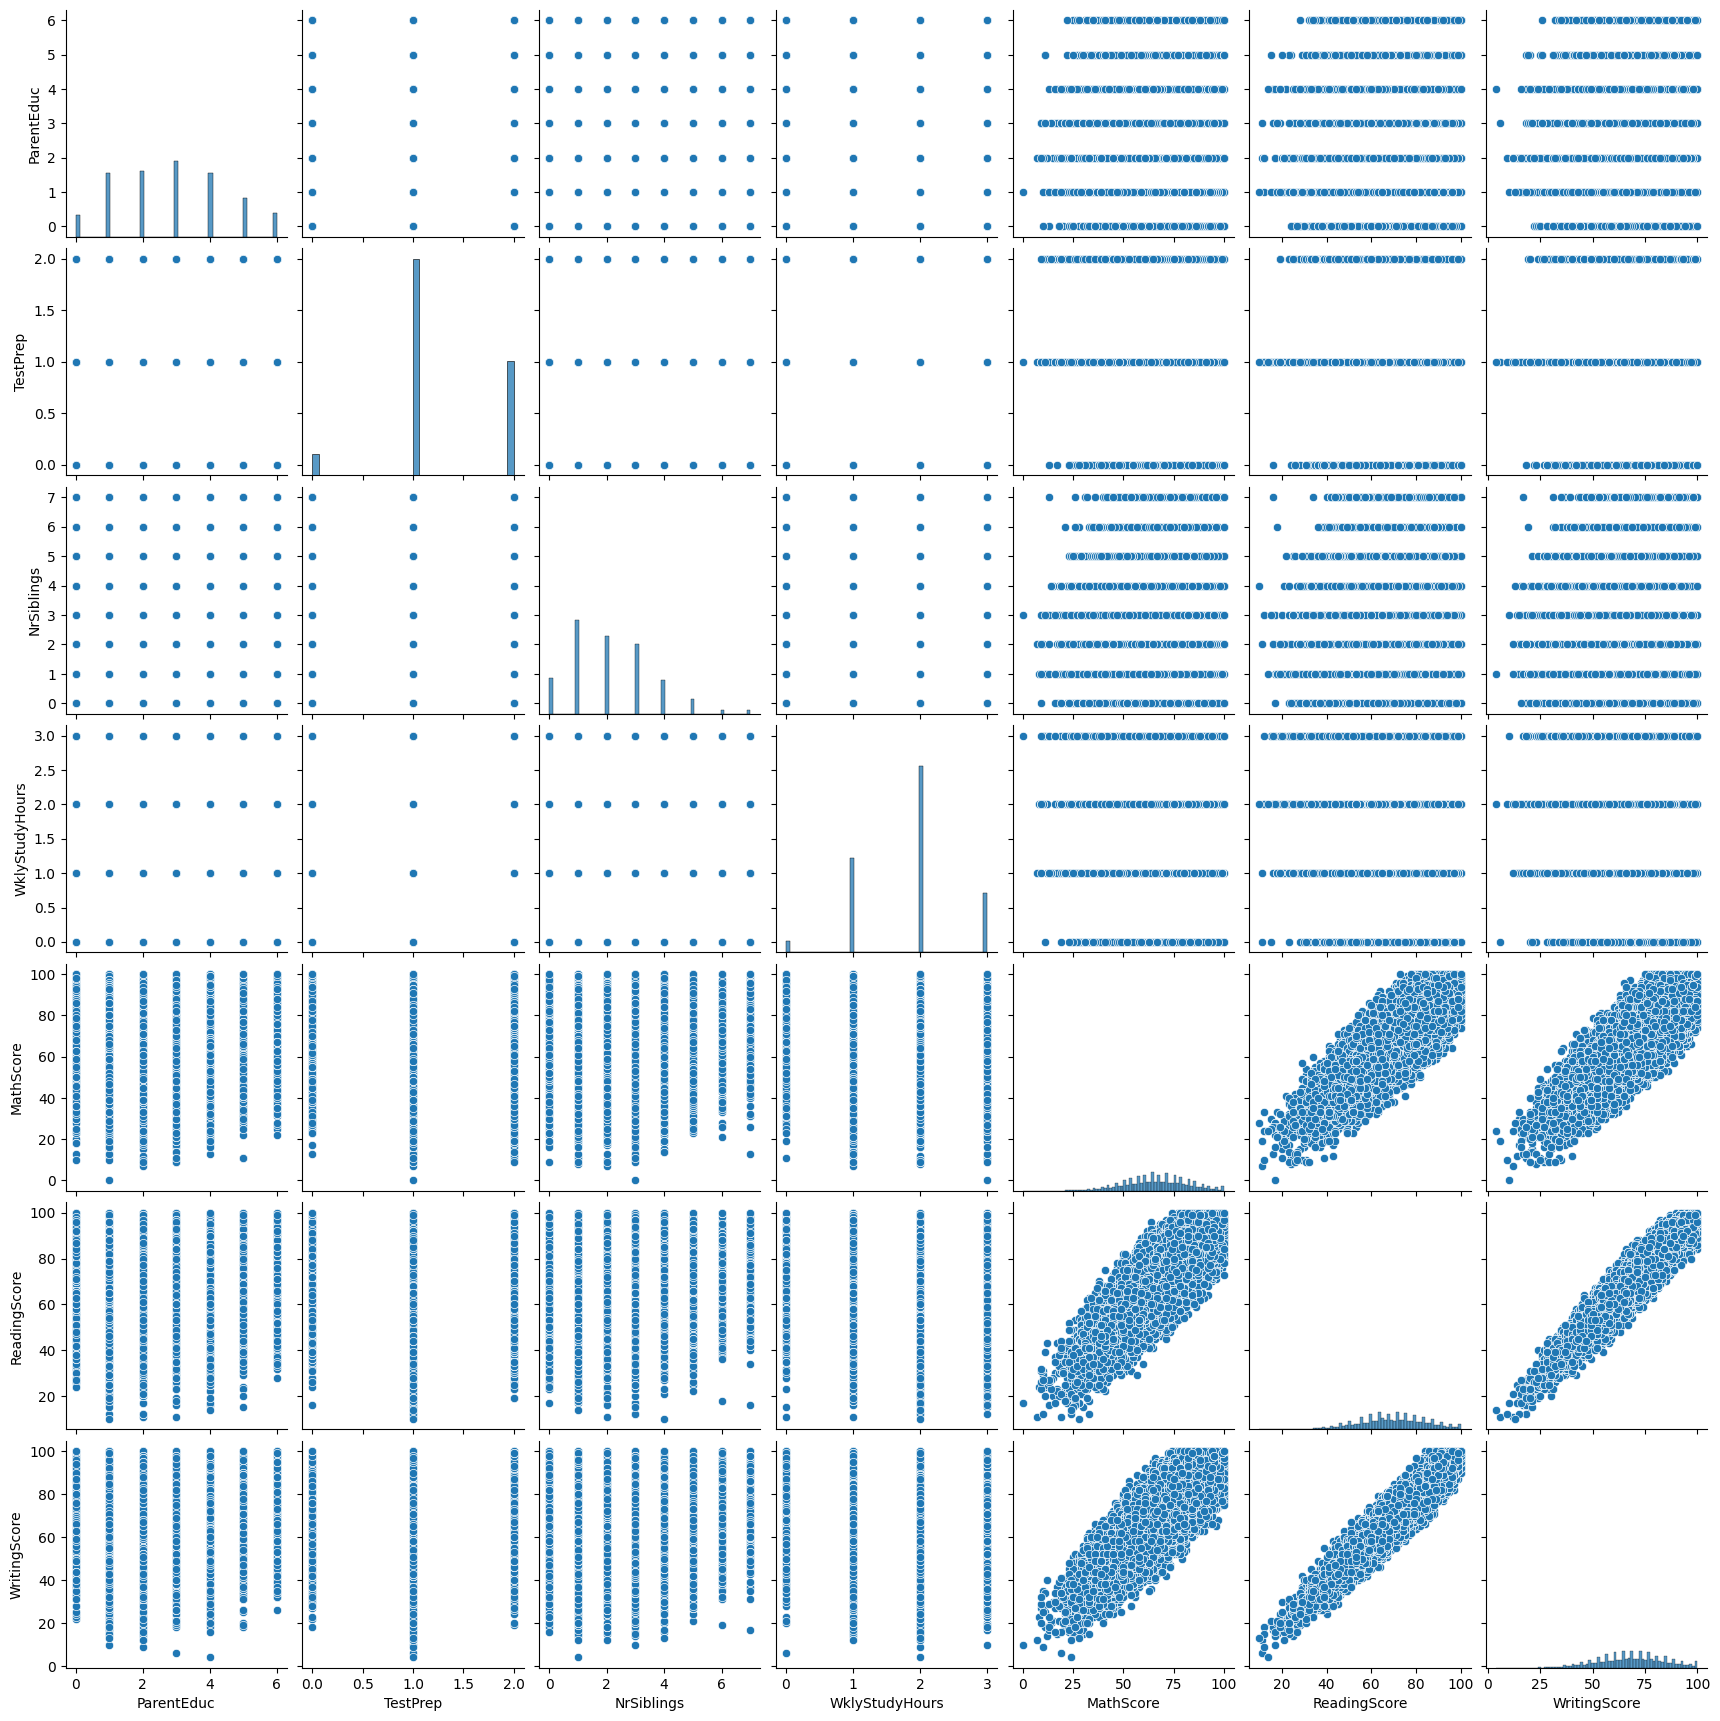

In [11]:
dfp = df.drop("Unnamed: 0", axis=1)

# Plot the pairplot
sns.pairplot(dfp)

# Display the plot
plt.show()

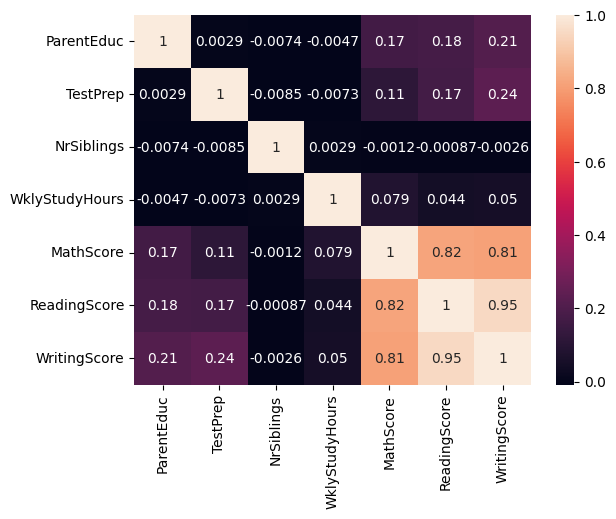

In [12]:
sns.heatmap(dfp.corr(), annot=True);

In [13]:
X = df[['ParentEduc','TestPrep', 'WklyStudyHours','ReadingScore','WritingScore']]
X

,ParentEduc,TestPrep,WklyStudyHours,ReadingScore,WritingScore
0,5,1,1,71,74
1,3,0,2,90,88
2,6,1,1,93,91
3,4,1,2,56,42
4,3,1,2,78,75
...,...,...,...,...,...
30636,2,1,2,61,65
30637,2,1,2,53,51
30638,2,2,2,70,67
30639,4,2,2,90,93


In [14]:
y = df[['MathScore']]
y

,MathScore
0,71
1,69
2,87
3,45
4,76
...,...
30636,59
30637,58
30638,61
30639,82


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [16]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Display the predicted values
print("Predicted values:")
print(y_pred)

Predicted values:
[[80.14447531]
 [77.78870283]
 [82.28879471]
 ...
 [73.75967013]
 [56.62888856]
 [69.29625055]]


In [17]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [18]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the predicted values alongside the actual test values
results = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
print(results)

# Display evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("\nMean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

      Actual  Predicted
0         70  80.144475
1         90  77.788703
2         81  82.288795
3         55  55.950177
4         49  50.202261
...      ...        ...
6124      59  44.922853
6125      79  65.644237
6126      65  73.759670
6127      66  56.628889
6128      59  69.296251

[6129 rows x 2 columns]
Mean Absolute Error (MAE): 7.090540056805373

Mean Squared Error (MSE): 74.70619692029028
R-squared (R2): 0.6780320415298873


In [19]:
from sklearn.tree import DecisionTreeRegressor

In [20]:
model2 = DecisionTreeRegressor(max_depth=2)

# Fit the model on the training data
model2.fit(X_train, y_train)

# Predict on the test data
y_pred2 = model2.predict(X_test)

# Calculate evaluation metrics
mse2 = mean_squared_error(y_test, y_pred2)
mae2 = mean_absolute_error(y_test, y_pred2)
r22 = r2_score(y_test, y_pred2)

# Display evaluation metrics
print("Mean Squared Error (MSE):", mse2)
print("Mean Absolute Error (MAE):", mae2)
print("R-squared (R2):", r22)

Mean Squared Error (MSE): 93.42336940312491
Mean Absolute Error (MAE): 7.781381369205466
R-squared (R2): 0.5973649742575271


In [21]:
from sklearn.ensemble import RandomForestRegressor



In [22]:
model3 = RandomForestRegressor()

# Fit the model on the training data
model3.fit(X_train, y_train)

# Predict on the test data
y_pred3 = model.predict(X_test)

# Calculate evaluation metrics
mse3 = mean_squared_error(y_test, y_pred3)
mae3 = mean_absolute_error(y_test, y_pred3)
r23 = r2_score(y_test, y_pred3)

# Display evaluation metrics
print("Mean Squared Error (MSE):", mse3)
print("Mean Absolute Error (MAE):", mae3)
print("R-squared (R2):", r23)

C:\Users\Blanca\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Mean Squared Error (MSE): 74.70619692029028
Mean Absolute Error (MAE): 7.090540056805373
R-squared (R2): 0.6780320415298873


In [23]:
model3 = RandomForestRegressor(n_estimators=50, max_depth=3)

# Fit the model on the training data
model3.fit(X_train, y_train)

# Predict on the test data
y_pred3 = model.predict(X_test)

# Calculate evaluation metrics
mse3 = mean_squared_error(y_test, y_pred3)
mae3 = mean_absolute_error(y_test, y_pred3)
r23 = r2_score(y_test, y_pred3)

# Display evaluation metrics
print("Mean Squared Error (MSE):", mse3)
print("Mean Absolute Error (MAE):", mae3)
print("R-squared (R2):", r23)

C:\Users\Blanca\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Mean Squared Error (MSE): 74.70619692029028
Mean Absolute Error (MAE): 7.090540056805373
R-squared (R2): 0.6780320415298873


In [24]:
X = df[['WklyStudyHours','ReadingScore','WritingScore']]
X

,WklyStudyHours,ReadingScore,WritingScore
0,1,71,74
1,2,90,88
2,1,93,91
3,2,56,42
4,2,78,75
...,...,...,...
30636,2,61,65
30637,2,53,51
30638,2,70,67
30639,2,90,93


In [25]:
y

,MathScore
0,71
1,69
2,87
3,45
4,76
...,...
30636,59
30637,58
30638,61
30639,82


In [26]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Display the predicted values
print("Predicted values:")
print(y_pred)

Predicted values:
[[81.12907233]
 [78.84912134]
 [80.45430723]
 ...
 [73.64132692]
 [56.38734942]
 [68.45279344]]


In [27]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the predicted values alongside the actual test values
results = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
print(results)

# Display evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("\nMean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

      Actual  Predicted
0         70  81.129072
1         90  78.849121
2         81  80.454307
3         55  55.815182
4         49  51.340080
...      ...        ...
6124      59  44.784220
6125      79  65.183029
6126      65  73.641327
6127      66  56.387349
6128      59  68.452793

[6129 rows x 2 columns]
Mean Absolute Error (MAE): 7.113026296886216

Mean Squared Error (MSE): 75.3638459252131
R-squared (R2): 0.6751977129703592


In [35]:
model2 = DecisionTreeRegressor(max_depth=7)

# Fit the model on the training data
model2.fit(X_train, y_train)

# Predict on the test data
y_pred2 = model2.predict(X_test)

# Calculate evaluation metrics
mse2 = mean_squared_error(y_test, y_pred2)
mae2 = mean_absolute_error(y_test, y_pred2)
r22 = r2_score(y_test, y_pred2)

# Display evaluation metrics
print("Mean Squared Error (MSE):", mse2)
print("Mean Absolute Error (MAE):", mae2)
print("R-squared (R2):", r22)

Mean Squared Error (MSE): 77.39344415246867
Mean Absolute Error (MAE): 7.185406075147562
R-squared (R2): 0.6664505725096921
